# Task 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
np.random.seed(42)


# 1.

Decison Tree for Raw Accelerometer Data

In [3]:
# get feature names from the file features.txt
raw_features = list()
with open(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\features.txt')as f:
    raw_features = [line.split()[1] for line in f.readlines()]

In [4]:
seen = set()
uniq_features = []
for idx, x in enumerate(raw_features):
    if x not in seen:
        uniq_features.append(x)
        seen.add(x)
    elif x + 'n' not in seen:
        uniq_features.append(x + 'n')
        seen.add(x + 'n')
    else:
        uniq_features.append(x + 'nn')
        seen.add(x + 'nn')
len(uniq_features)

561

In [5]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\train\X_train.txt', 
                      delim_whitespace=True, header=None, names=uniq_features)

# # add subject column to the dataframe
X_train['subject'] = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\train\subject_train.txt',
                                  header=None, squeeze=True)

y_train = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\train\y_train.txt', 
                      names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# # put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

C:\Users\shanb\AppData\Local\Temp\ipykernel_17040\217939716.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train['subject'] = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\train\subject_train.txt',
C:\Users\shanb\AppData\Local\Temp\ipykernel_17040\217939716.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\train\y_train.txt',


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4525,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,...,-0.034924,0.558036,0.258975,-0.854858,-0.78433,0.22296,-0.066506,22,3,WALKING_DOWNSTAIRS


In [6]:
# get the data from txt files to pandas dataframe
X_test = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\test\X_test.txt',
                      delim_whitespace=True, header=None, names=uniq_features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\test\subject_test.txt',
                                 header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\test\y_test.txt',
                      names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()
print(test.shape)

(2947, 564)


C:\Users\shanb\AppData\Local\Temp\ipykernel_17040\2061156973.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_test['subject'] = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\test\subject_test.txt',
C:\Users\shanb\AppData\Local\Temp\ipykernel_17040\2061156973.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv(r'C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\HAR\UCI HAR Dataset\test\y_test.txt',


In [7]:
dt_raw=DecisionTreeClassifier()
dt_raw.fit(X_train.drop('ActivityName',axis=1),y_train_labels)
y_pred=dt_raw.predict(X_test.drop('ActivityName',axis=1))

In [8]:
#metrics Evaluation
accuracy_raw = accuracy_score(y_test_labels, y_pred)
precision_raw = precision_score(y_test_labels, y_pred,average='micro')
recall_raw = recall_score(y_test_labels, y_pred,average='micro')
confusion_matrix_raw = confusion_matrix(y_test_labels, y_pred)

print("Decision Tree using Raw Data:")
print("Accuracy:", np.round(accuracy_raw*100,4))
print("Precision:", np.round(precision_raw*100,4))
print("Recall:", np.round(recall_raw*100,4))

Decision Tree using Raw Data:
Accuracy: 100.0
Precision: 100.0
Recall: 100.0


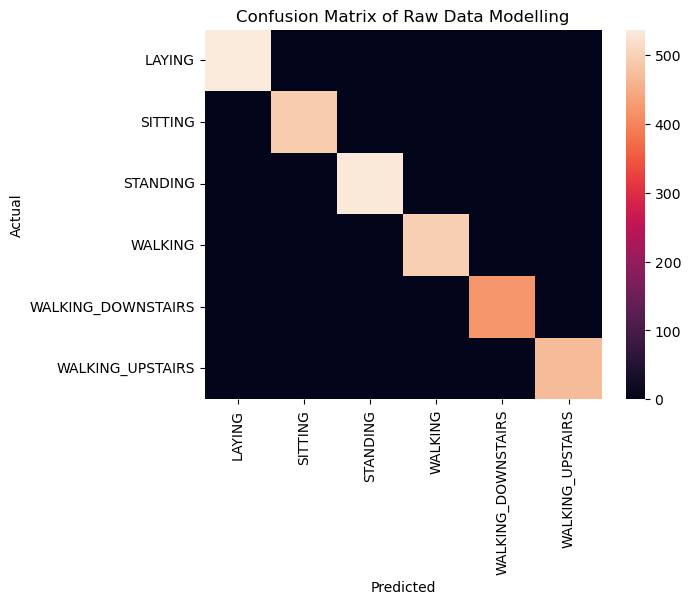

In [9]:
import seaborn as sns
r_htm=sns.heatmap(confusion_matrix_raw)
r_htm.set_xticklabels(np.unique(y_train_labels,return_counts=False))
r_htm.set_yticklabels(np.unique(y_train_labels,return_counts=False))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Confusion Matrix of Raw Data Modelling')
plt.show()

In [10]:
raw_X=pd.concat([X_train,X_test],axis=0)


In [11]:
from sklearn.model_selection import cross_val_score
# Performing 5-fold cross-validation
r_accuracy_scores = cross_val_score(dt_raw,raw_X.drop('ActivityName',axis=1),raw_X['ActivityName'], cv=5,scoring='accuracy')
r_precision_scores=cross_val_score(dt_raw,raw_X.drop('ActivityName',axis=1),raw_X['ActivityName'], cv=5,scoring='precision_micro')
r_recall_scores=cross_val_score(dt_raw,raw_X.drop('ActivityName',axis=1),raw_X['ActivityName'], cv=5,scoring='recall_micro')

In [12]:
# Printing the cross-validation scores
print("Evaluation Metrics for Raw Data Modelling post cross-validation:")
print("Mean Accuracy:", round(r_accuracy_scores.mean()*100,4))
print("Mean Precision:", round(r_precision_scores.mean()*100,4))
print("Mean recall:", round(r_recall_scores.mean()*100,4))

Evaluation Metrics for Raw Data Modelling post cross-validation:
Mean Accuracy: 99.8058
Mean Precision: 99.9612
Mean recall: 99.7573


Decision Tree for Dataset

In [13]:
X=np.load(r"C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\Combined\X.npy")
y=np.load(r"C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\Combined\y.npy")
print(X.shape,y.shape)

(180, 500, 3) (180,)


In [14]:
X_m= np.empty((180, 15))
print(X[0,:,0].shape)
i=0
for row in X_m:
    j=0
    while (5*j<15):
        row[5*j+0] = np.mean(X[i,:,j])
        row[5*j+1] = np.median(X[i,:,j])
        row[5*j+2] = np.std(X[i,:,j])
        row[5*j+3] = np.min(X[i,:,j])
        row[5*j+4] = np.max(X[i,:,j])
        j+=1
    i+=1
print(X_m.shape)

(500,)
(180, 15)


In [15]:
data_df=pd.DataFrame(X_m)
data_df['label']=y
data_df.columns=['acc_x_mean','acc_x_median','acc_x_std','acc_x_min','acc_x_max',
                 'acc_y_mean','acc_y_median','acc_y_std','acc_y_min','acc_y_max',
                 'acc_z_mean','acc_z_median','acc_z_std','acc_z_min','acc_z_max','label']

In [16]:
data_X_train,data_X_test,data_y_train,data_y_test=train_test_split(data_df.drop('label',axis=1),
                                                                   data_df['label'],test_size=0.3,random_state=42,stratify=y)
dt_data=DecisionTreeClassifier()
dt_data.fit(data_X_train,data_y_train)
data_y_pred=dt_data.predict(data_X_test)

In [17]:
#metrics Evaluation
accuracy_data = accuracy_score(data_y_test, data_y_pred)
precision_data = precision_score(data_y_test, data_y_pred,average='micro')
recall_data = recall_score(data_y_test, data_y_pred,average='micro')
confusion_matrix_data = confusion_matrix(data_y_test, data_y_pred)

print("Decision Tree using dataset:")
print("Accuracy:", np.round(accuracy_data*100,4))
print("Precision:", np.round(precision_data*100,4))
print("Recall:", np.round(recall_data*100,4))

Decision Tree using dataset:
Accuracy: 81.4815
Precision: 81.4815
Recall: 81.4815


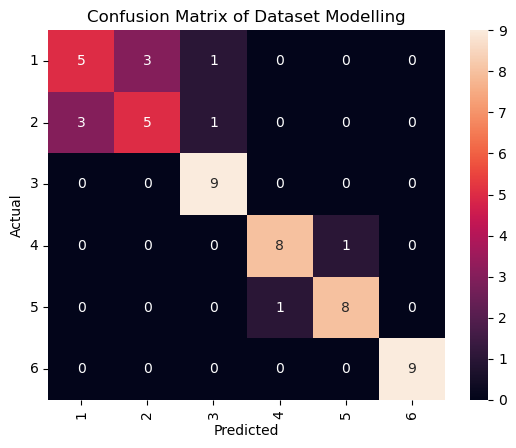

In [18]:
import seaborn as sns
d_htm=sns.heatmap(confusion_matrix_data,annot=True)
d_htm.set_xticklabels(np.unique(y,return_counts=False))
d_htm.set_yticklabels(np.unique(y,return_counts=False))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Confusion Matrix of Dataset Modelling')
plt.show()

In [19]:
# Performing 5-fold cross-validation on Dataset Decision Tree Model
data_accuracy_scores = cross_val_score(dt_data,data_df.drop('label',axis=1),data_df['label'], cv=5,scoring='accuracy')
data_precision_scores=cross_val_score(dt_data,data_df.drop('label',axis=1),data_df['label'], cv=5,scoring='precision_micro')
data_recall_scores=cross_val_score(dt_data,data_df.drop('label',axis=1),data_df['label'], cv=5,scoring='recall_micro')

In [20]:
# Printing the cross-validation scores
print("Evaluation Metrics for Dataset Modelling post cross-validation:")
print("Mean Accuracy:", round(data_accuracy_scores.mean()*100,4))
print("Mean Precision:", round(data_precision_scores.mean()*100,4))
print("Mean recall:", round(data_recall_scores.mean()*100,4))

Evaluation Metrics for Dataset Modelling post cross-validation:
Mean Accuracy: 75.0
Mean Precision: 75.5556
Mean recall: 76.1111


Decision Tree for TSFEL feature 

In [21]:
t_feat=np.load(r"C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\Combined\features.npy")
t_label=np.load(r"C:\Users\shanb\OneDrive\Desktop\IIT GN\ML_Assign\Assign_1\es335-24-fall-assignment-1\Combined\labels.npy")
t_df=pd.DataFrame(t_feat)
t_df['label']=t_label
t_df.columns=['mean','median','std','min','max','label']
print(t_df)

         mean    median       std       min       max             label
0    0.993032  0.993012  0.993012  0.982718  1.002362            LAYING
1    0.997032  0.997155  0.997155  0.986797  1.006004            LAYING
2    0.994540  0.994476  0.994476  0.981171  1.005202            LAYING
3    1.000225  1.000068  1.000068  0.986974  1.009767            LAYING
4    1.000590  1.000284  1.000284  0.981556  1.013705            LAYING
..        ...       ...       ...       ...       ...               ...
175  1.048716  0.994406  0.994406  0.569826  1.908706  WALKING_UPSTAIRS
176  1.043880  0.972626  0.972626  0.473665  1.848832  WALKING_UPSTAIRS
177  1.036926  0.993311  0.993311  0.590271  1.661743  WALKING_UPSTAIRS
178  1.042090  1.021084  1.021084  0.574184  1.811295  WALKING_UPSTAIRS
179  1.038287  1.002361  1.002361  0.709945  1.638513  WALKING_UPSTAIRS

[180 rows x 6 columns]


In [22]:
t_X_train,t_X_test,t_y_train,t_y_test=train_test_split(t_df.drop('label',axis=1),t_df['label'],test_size=0.3,random_state=42,stratify=y)
dt_t=DecisionTreeClassifier()
dt_t.fit(t_X_train,t_y_train)
t_y_pred=dt_t.predict(t_X_test)

In [23]:
#metrics Evaluation
accuracy_t = accuracy_score(t_y_test, t_y_pred)
precision_t = precision_score(t_y_test, t_y_pred,average='micro')
recall_t = recall_score(t_y_test, t_y_pred,average='micro')
confusion_matrix_t = confusion_matrix(t_y_test, t_y_pred)

print("Decision Tree metrics afte obtaining TSFEL features:")
print("Accuracy:", np.round(accuracy_t*100,4))
print("Precision:", np.round(precision_t*100,4))
print("Recall:", np.round(recall_t*100,4))

Decision Tree metrics afte obtaining TSFEL features:
Accuracy: 75.9259
Precision: 75.9259
Recall: 75.9259


In [24]:
print()

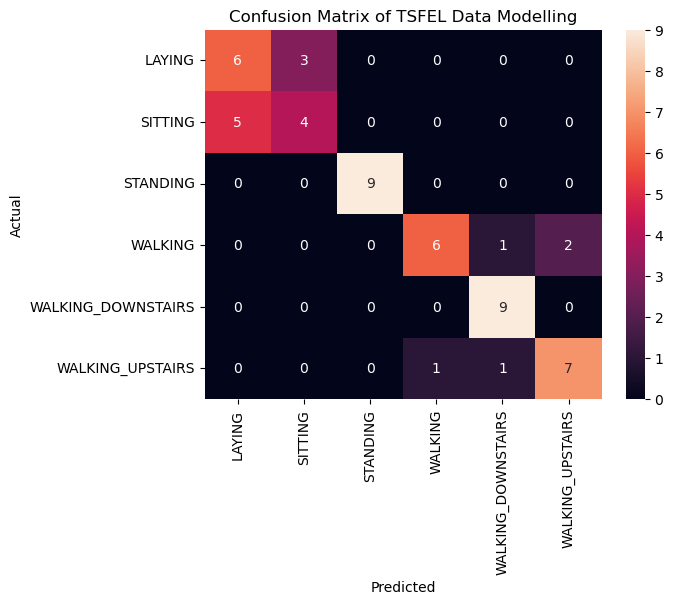

In [25]:
t_htm=sns.heatmap(confusion_matrix_t,annot=True)
t_htm.set_xticklabels(np.unique(t_label,return_counts=False))
t_htm.set_yticklabels(np.unique(t_label,return_counts=False))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of TSFEL Data Modelling')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [26]:
# Performing 5-fold cross-validation on Dataset Decision Tree Model
t_accuracy_scores = cross_val_score(dt_t,t_df.drop('label',axis=1),t_df['label'], cv=5,scoring='accuracy')
t_precision_scores=cross_val_score(dt_t,t_df.drop('label',axis=1),t_df['label'], cv=5,scoring='precision_micro')
t_recall_scores=cross_val_score(dt_t,t_df.drop('label',axis=1),t_df['label'], cv=5,scoring='recall_micro')

In [27]:
# Printing the cross-validation scores
print("Evaluation Metrics for Dataset Modelling post cross-validation:")
print("Mean Accuracy:", round(t_accuracy_scores.mean()*100,4))
print("Mean Precision:", round(t_precision_scores.mean()*100,4))
print("Mean recall:", round(t_recall_scores.mean()*100,4))

Evaluation Metrics for Dataset Modelling post cross-validation:
Mean Accuracy: 65.5556
Mean Precision: 64.4444
Mean recall: 62.7778


In [28]:
# Function to iterate over depths and determine accuracies
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
def accuracy_on_depth(model,X_train,y_train,X_test,y_test,depths):
    """Calculates accuracies of the model, as the depth is varied"""
    accuracies=[]
    for depth in depths:
        model.max_depth=depth
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test,y_pred)
        accuracies.append(accuracy)
    return np.array(accuracies)

def plot_depth_accuracy(depths,accuracies,Title):
    """Plots depth vs accuracy plot for the model"""
    plt.plot(depths,accuracies)
    plt.grid()
    plt.xlabel("Depth")
    plt.ylabel("Accuracy")
    plt.title("Plot of Depth vs Accuracy for Decision Tree Model on "+Title)
    plt.show()

# 2
 Depth vs Accuracy Analysis 

[0.5        0.75925926 0.77777778 0.77777778 0.75925926 0.7962963
 0.77777778]


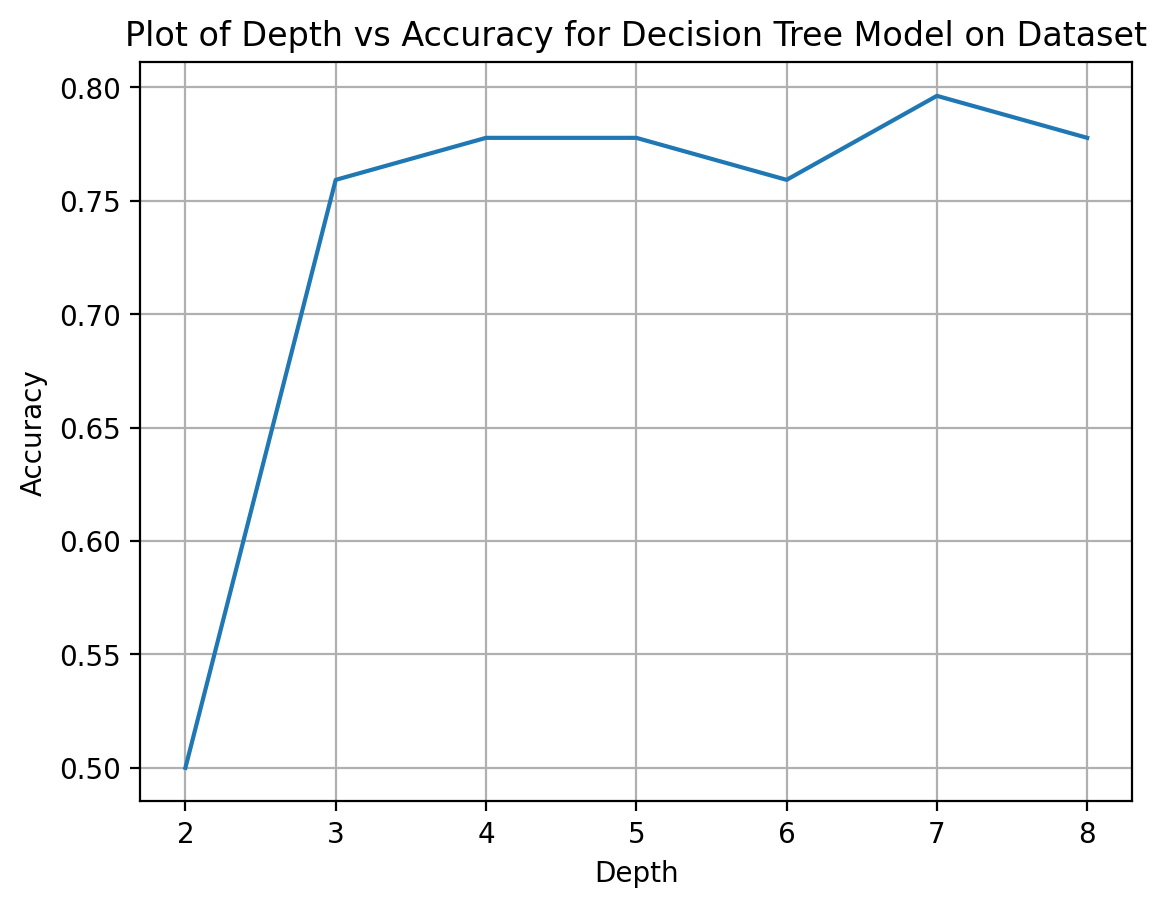

In [29]:
depths=[2,3,4,5,6,7,8]

# For a decision tree on Dataset
data_accuracies=accuracy_on_depth(dt_data,data_X_train,data_y_train,data_X_test,data_y_test,depths)
print(data_accuracies)

plot_depth_accuracy(depths,data_accuracies,"Dataset")

[0.64814815 0.74074074 0.77777778 0.77777778 0.75925926 0.77777778
 0.75925926]


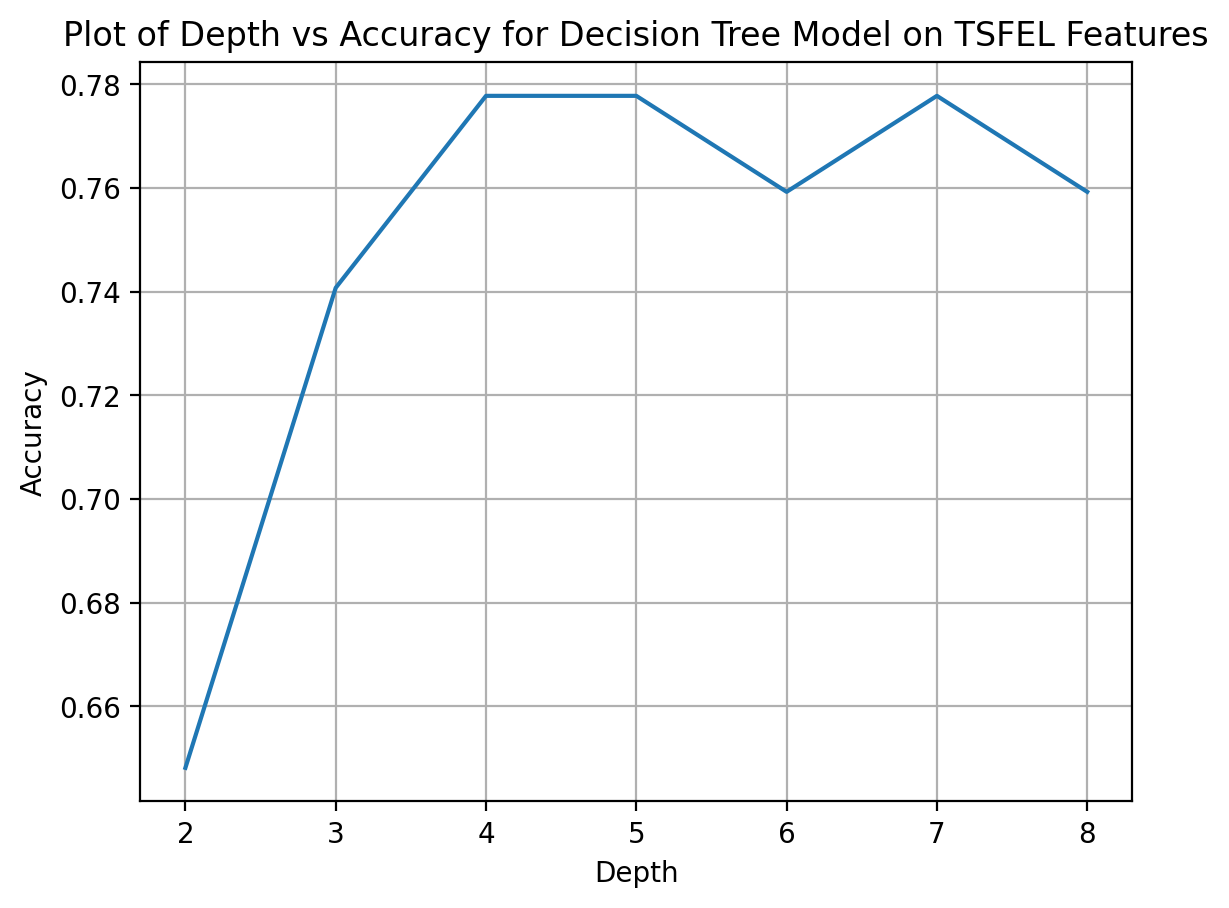

In [30]:
# For a decision tree after TSFEL
t_accuracies=accuracy_on_depth(dt_t,t_X_train,t_y_train,t_X_test,t_y_test,depths)
print(t_accuracies)

plot_depth_accuracy(depths,t_accuracies,"TSFEL Features")

[0.52935188 0.69765864 0.85748219 1.         1.         1.
 1.        ]


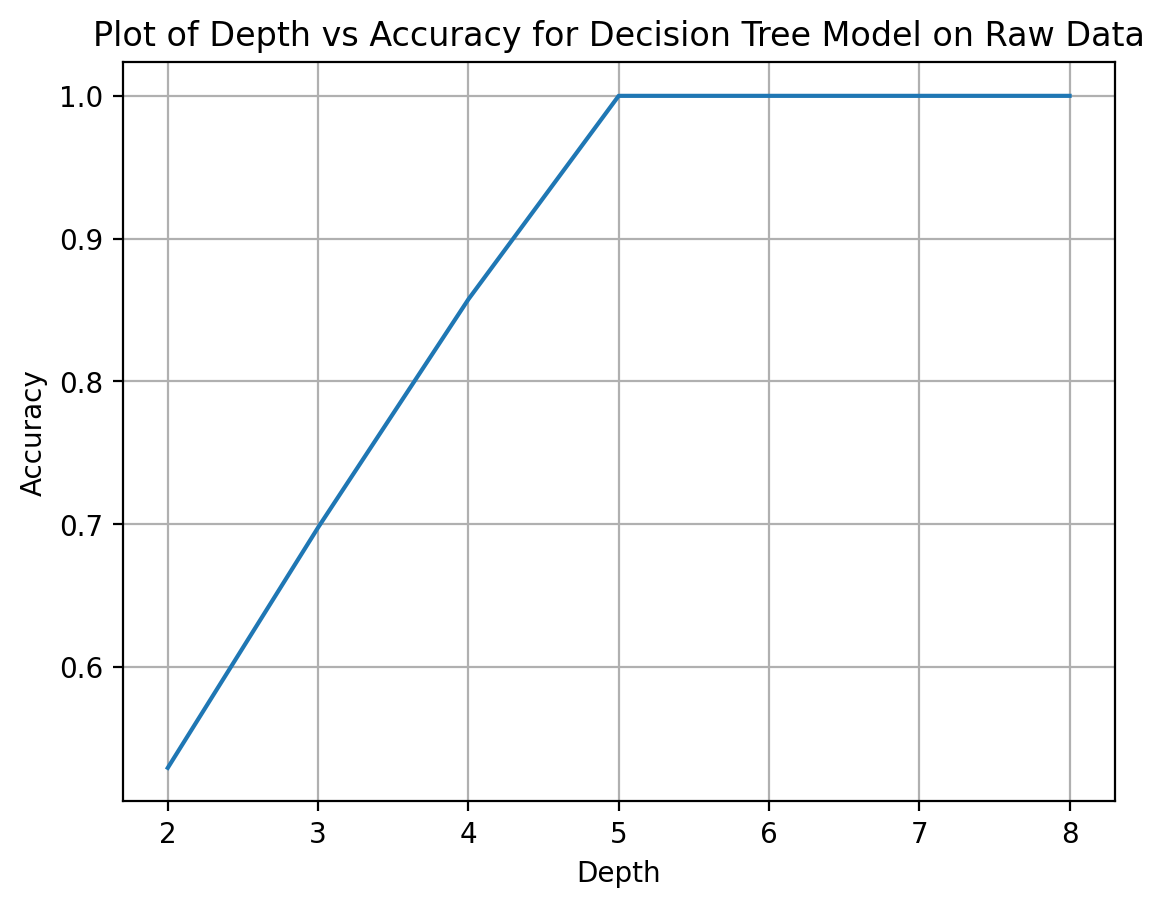

In [31]:
# For a decision tree after raw data
raw_accuracies=accuracy_on_depth(dt_raw,X_train.drop('ActivityName',axis=1),y_train_labels,
                                 X_test.drop('ActivityName',axis=1),y_test_labels,depths)
print(raw_accuracies)

plot_depth_accuracy(depths,raw_accuracies,"Raw Data")

# 3

After the model analysis it can be inferred that barring the model for raw accelerometer data, the other two models have little bit of 'confusion' while predicting the classes of 'Laying' and 'Sitting'. This can be attributed to its acceleration features at that time, which almost remains still during both the activities. As only accelreation features have been taken into account for both these models, it becomes difficult for both of them to exactly distinguish among these two classes.

However, there is a distinction in both models while they predict for the 'Walking' classes. While the model for dataset, pretty much accurately predicts all the walking classes, the model after TSFEL feature extraction, is little less accurate while predicting 'Walking','Walking Upstairs' and 'Walking Downstairs'. This can be attributed to the feature of magnitude of total acceleration that is taken into account while modelling. As total accleration patterns can be similar for the walking classes, the confusion is seen while predicting them.